# CIFAR-10 dataset

The CIFAR-10 dataset consists of:
- 60000 `32x32` colour images in 10 classes
- with 6000 images per class.
- There are 50000 training images and 10000 test images.

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")

In [3]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

### Load the model from keras API

In [4]:
cifar10 = tf.keras.datasets.cifar10

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [10]:
X_train[0].ndim, y_train.ndim

(3, 2)

##### step-1: normalizing the X_data by dividing 255.0 and we'll get values between 0-1 since 255 is the highset value.
##### step-2: target data is in 2D. we need to flatten them to reduce the dimension.

In [6]:
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [23]:
y_train.shape

50000

In [9]:
# look the first image
print(f"shape: {X_train[0].shape}, dimension: {X_train[0].ndim}")

shape: (32, 32, 3), dimension: 3


In [7]:
# number of classes
K = len(np.unique(y_train))
print(f"number of classes: {K}")

number of classes: 10


#### classes

|label|description|
|:--:|:---|
|0|airplane|
|1|automobile|
|2|bird|
|3|cat |
|4|deer |
|5|dog |
|6|frog |
|7|horse |
|8|ship |
|9|truck|

In [8]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

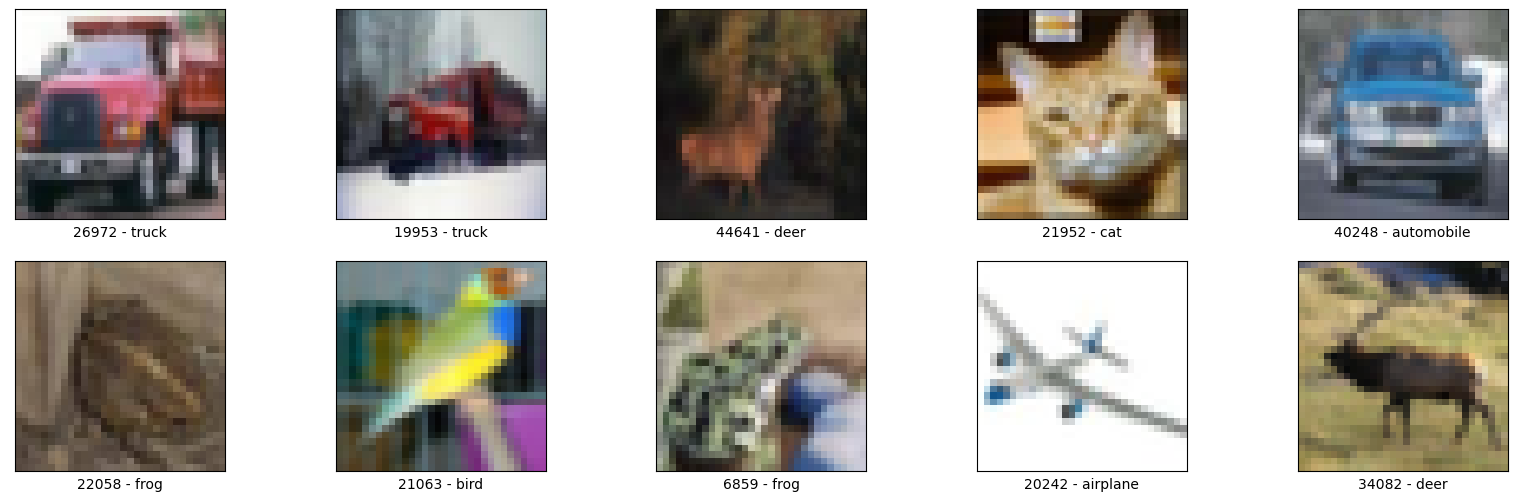

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 6))

for _, axi in enumerate(ax.flat):
    idx = np.random.choice(range(X_train.shape[0]))
    axi.imshow(X_train[idx])
    axi.set(xlabel=f"{idx} - {classes[y_train[idx]]}")
    axi.set(xticks=[], yticks=[]);

#### Keras functional API

In [28]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [29]:
%%time
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 215s 4ms/sample - loss: 1.5929 - accuracy: 0.4190 - val_loss: 1.3734 - val_accuracy: 0.4920
Epoch 2/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.2985 - accuracy: 0.5326 - val_loss: 1.1445 - val_accuracy: 0.5898
Epoch 3/15
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.1722 - accuracy: 0.5779 - val_loss: 1.0566 - val_accuracy: 0.6226
Epoch 4/15
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.0813 - accuracy: 0.6128 - val_loss: 1.0263 - val_accuracy: 0.6350
Epoch 5/15
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.0112 - accuracy: 0.6397 - val_loss: 0.9555 - val_accuracy: 0.6636
Epoch 6/15
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.9539 - accuracy: 0.6616 - val_loss: 0.9216 - val_accuracy: 0.6747
Epoch 7/15
50000/50000 [==============================]

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               590336

In [31]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 361us/sample - loss: 0.8107 - accuracy: 0.7182


[0.8107290451049805, 0.7182]

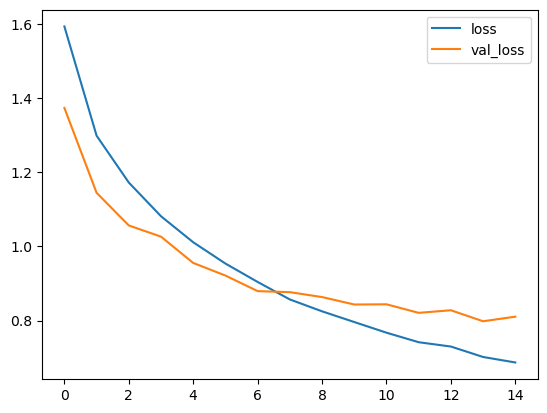

In [32]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

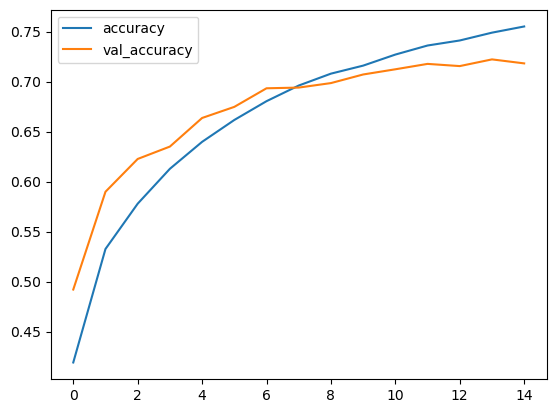

In [33]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

### missclassified images

In [34]:
y_pred = model.predict(X_test)
y_pred.shape

(10000, 10)

In [36]:
y_pred[0]

array([0.00330141, 0.00399688, 0.01525141, 0.53502274, 0.00489087,
       0.3780583 , 0.02407874, 0.00245184, 0.03151485, 0.00143284],
      dtype=float32)

In [37]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1000
           1       0.84      0.82      0.83      1000
           2       0.70      0.56      0.62      1000
           3       0.54      0.51      0.52      1000
           4       0.63      0.73      0.68      1000
           5       0.63      0.63      0.63      1000
           6       0.73      0.82      0.77      1000
           7       0.79      0.75      0.77      1000
           8       0.82      0.84      0.83      1000
           9       0.74      0.83      0.78      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



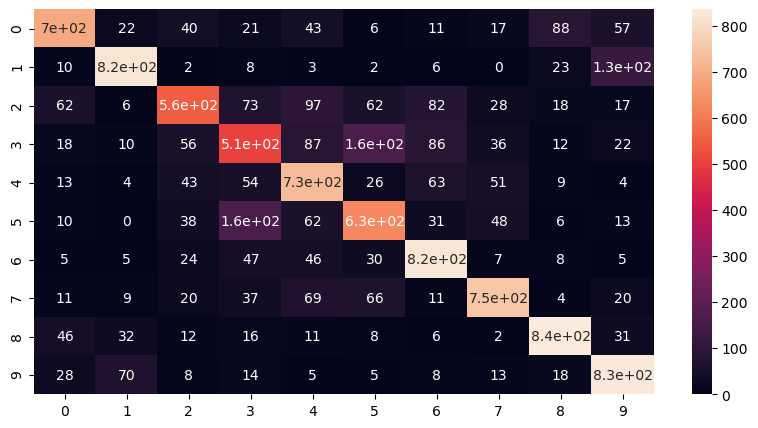

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 5))
sns.heatmap(cm, annot = True)

**TP:** The diagonal values (top-left☝👈 to bottom-right👉👇)

**TN:** sum of all columns and rows except that class's column and row

**FN:** sum of all value of that class's row except `TP`

**FP:** sum of all value of that class's column except `TP`

So, $ precision = \frac{TP}{TP+FP} = \frac{TP}{totalPredictedPositive} $

$ recall = \frac{TP}{TP+FN} = \frac{TP}{totalActualPositive} $

$ f1 = 2*\frac{(precision)*(recall)}{(precision)+(recall)} $

$ accuracy = \frac{TP+TN}{Total} $

In [38]:
missclassified_idx = np.where(y_pred != y_test)
type(missclassified_idx)

tuple

In [42]:
len(missclassified_idx[0])

2818

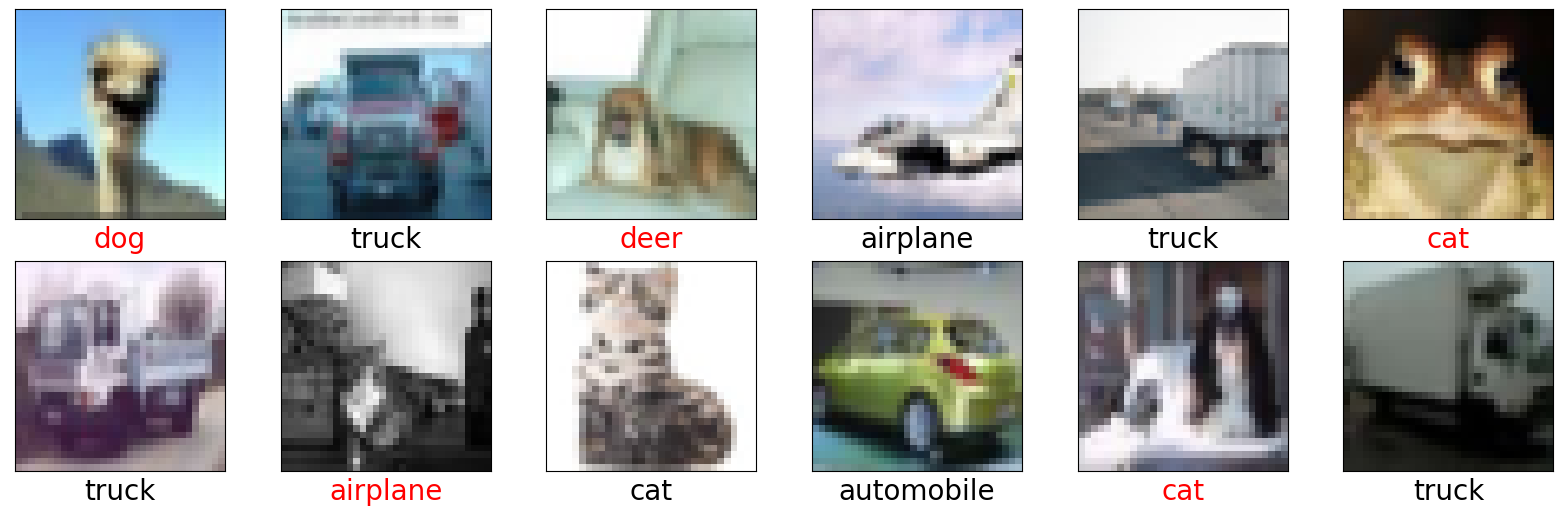

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

for _, axi in enumerate(ax.flat):
    idx = np.random.choice(range(X_test.shape[0]))
    axi.imshow(X_test[idx])
    axi.set_xlabel(f"{classes[y_pred[idx]]}",
                   color="black" if y_test[idx] == y_pred[idx] else "red",
                   fontsize=20)
    axi.set(xticks=[], yticks=[]);

### Accuracy of the model `71.82%`. 
Apply 
- MaxPooling
- Batch Normalization

let's see if the accuracy improves

Before that, restart the kernel otherwise previous fitted model will impact the next training.

![vgg16](images/vgg16.jpg)

Following `VGG-16`, multiple convolution layer before pooling

$ padding = "same" $ and $ stride = 1 $ because the images will shrink after each convolution without _same_ padding, which will make the image too small to do this many convolution.

In [10]:
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), activation="relu", padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [11]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#### Create a callback class

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.98):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True

In [13]:
%%time

callbacks = myCallback()
r = model.fit(X_train,
              y_train,
              validation_data=(X_test, y_test),
              epochs=15,
              callbacks=[callbacks])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 1205s 24ms/sample - loss: 1.3156 - accuracy: 0.5439 - val_loss: 0.9996 - val_accuracy: 0.6459
Epoch 2/15
50000/50000 [==============================] - 1054s 21ms/sample - loss: 0.8641 - accuracy: 0.6996 - val_loss: 0.7868 - val_accuracy: 0.7346
Epoch 3/15
50000/50000 [==============================] - 1406s 28ms/sample - loss: 0.6964 - accuracy: 0.7609 - val_loss: 0.7727 - val_accuracy: 0.7358
Epoch 4/15
50000/50000 [==============================] - 1218s 24ms/sample - loss: 0.5816 - accuracy: 0.8018 - val_loss: 0.6888 - val_accuracy: 0.7677
Epoch 5/15
50000/50000 [==============================] - 1243s 25ms/sample - loss: 0.4966 - accuracy: 0.8292 - val_loss: 0.6609 - val_accuracy: 0.7829
Epoch 6/15
50000/50000 [==============================] - 1466s 29ms/sample - loss: 0.4233 - accuracy: 0.8543 - val_loss: 0.6699 - val_accuracy: 0.7899
Epoch 7/15
50000/50000 [==============

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [15]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 30s 3ms/sample - loss: 0.7151 - accuracy: 0.8253


[0.7150641003370285, 0.8253]

#### So, the accuracy improved from `71.82%` to `82.53%`

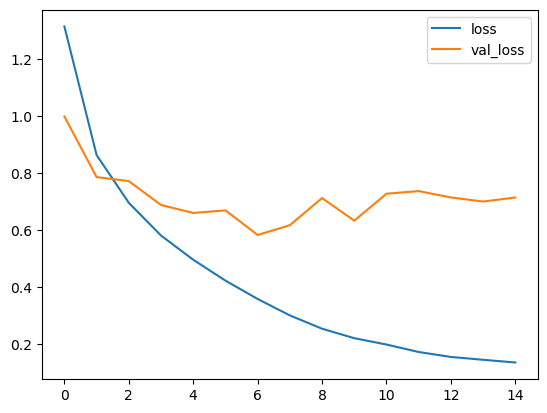

In [16]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

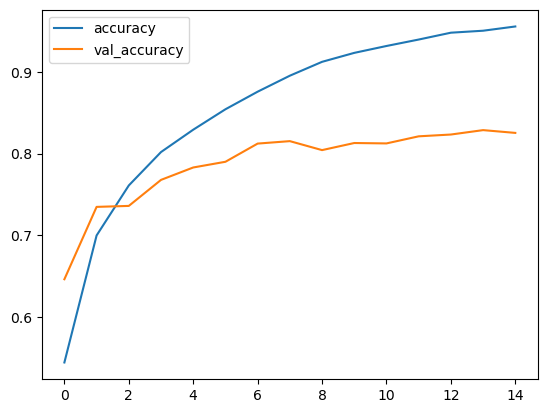

In [17]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

### misclassified images

In [18]:
y_pred = model.predict(X_test)
y_pred.shape

(10000, 10)

In [19]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.93      0.89      0.91      1000
           2       0.76      0.73      0.74      1000
           3       0.70      0.65      0.67      1000
           4       0.75      0.85      0.80      1000
           5       0.78      0.74      0.76      1000
           6       0.90      0.84      0.87      1000
           7       0.89      0.85      0.87      1000
           8       0.81      0.94      0.87      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000



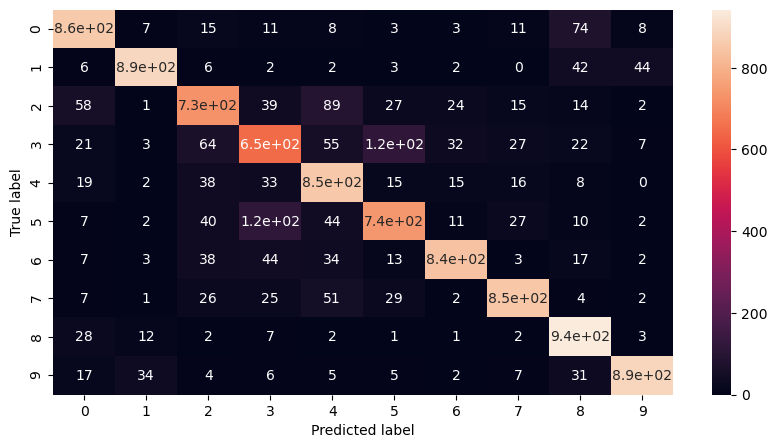

In [25]:
fig, ax = plt.subplots(figsize = (10, 5))

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True)
ax.set(xlabel="Predicted label", ylabel="True label");

#### observation:

- True label: 5 and predicted label: 3 gets confused most(120). Same for True label: 3 and predicted label: 5
- True label: 2 and predicted label: 4 gets confused pretty often(89).
- True label: 0 and predicted label: 8 gets confused pretty often(74).

In [22]:
missclassified_idx = np.where(y_pred != y_test)
len(missclassified_idx[0])

1747

#### In the previous model, there were 2818 misclassified images

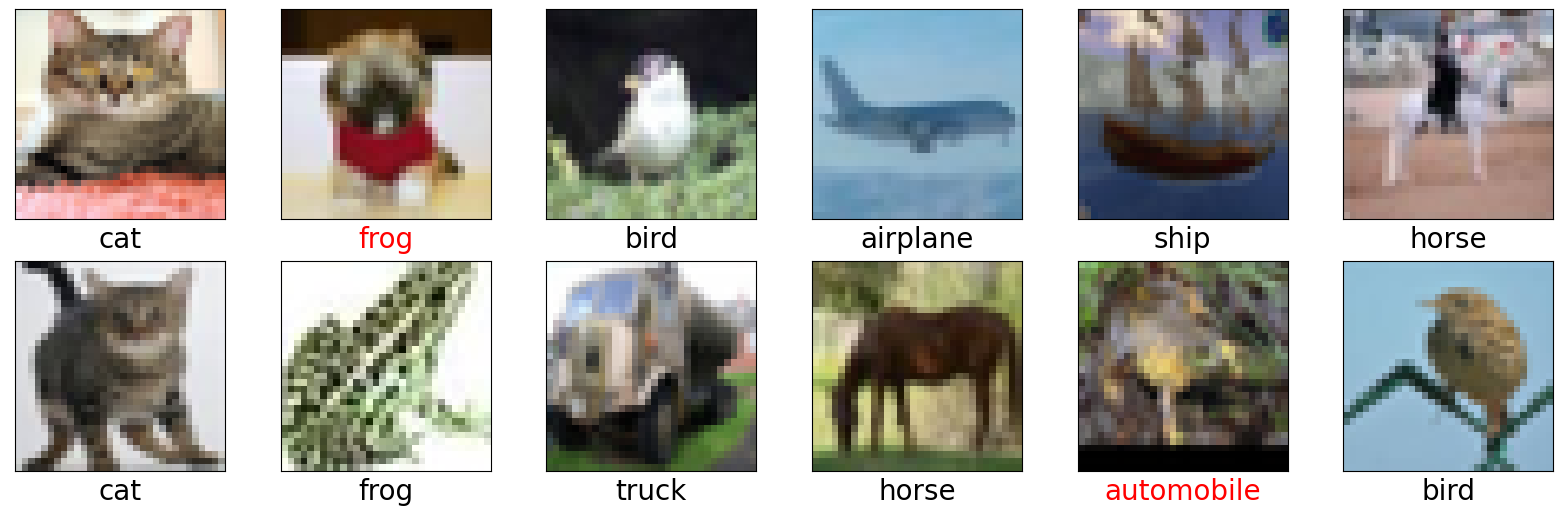

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

for _, axi in enumerate(ax.flat):
    idx = np.random.choice(range(X_test.shape[0]))
    axi.imshow(X_test[idx])
    axi.set_xlabel(f"{classes[y_pred[idx]]}",
                   color="black" if y_test[idx] == y_pred[idx] else "red",
                   fontsize=20)
    axi.set(xticks=[], yticks=[]);

### will try `Data Augmentation` later using gpu in google colab